In [5]:
"""
시계열 분석
-상관계수는 일반적으로 변수와 변수간의 관계
-데이터가 자기상관성(t, t-1)을 가지고 있으면 시계열분석(변수 하나)
-자기상관성(이전 데이터가 이후 데이터를 결정)
"""
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

numpy.random.seed(7)
dataframe = pandas.read_csv('passengers.csv', usecols=[1], engine='python', skipfooter=3)

dataset = dataframe.values # 컬럼명만 보기 (columns) 로우스 (index)
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.67) # 0 ~ 96
test_size = len(dataset) - train_size # 97 ~ 143
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [8]:
dataframe.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [11]:
# 시계열에서 단일 변수에 대해서 독립변수와 종속변수 결정
# 시계열의 종속변수는 변수자체에 있다
def create_dataset(dataset, look_back=1): #look_back : 이전데이터 몇개를 알아봐야 하는지? 옵션 -밑에서2를 넣어줌
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1): 
        a = dataset[i : (i + look_back),0]
        dataX.append(a) #x1, x2 : 2개씩 체크해 다음 데이터 결정
        dataY.append(dataset[i + look_back, 0]) # y
    return numpy.array(dataX), numpy.array(dataY)
look_back = 2 # 이전 데이터 2개
trainX, trainY = create_dataset(train, look_back) # 96 48 => (93, 2)
testX, testY = create_dataset(test, look_back)

# print(trainX, trainY)

In [9]:
model = Sequential()# output이 한개인 망

# look_back = 2 => 2x8 => ?x8
model.add(Dense(8, input_dim=look_back, activation='relu'))

# 1 => 8x1 => ?x1
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') # 회귀
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score : %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Epoch 1/200
47/47 - 0s - loss: 1159.3992
Epoch 2/200
47/47 - 0s - loss: 883.3723
Epoch 3/200
47/47 - 0s - loss: 876.3382
Epoch 4/200
47/47 - 0s - loss: 884.7176
Epoch 5/200
47/47 - 0s - loss: 868.0000
Epoch 6/200
47/47 - 0s - loss: 876.0247
Epoch 7/200
47/47 - 0s - loss: 870.5145
Epoch 8/200
47/47 - 0s - loss: 877.9031
Epoch 9/200
47/47 - 0s - loss: 868.7531
Epoch 10/200
47/47 - 0s - loss: 855.7730
Epoch 11/200
47/47 - 0s - loss: 845.4103
Epoch 12/200
47/47 - 0s - loss: 850.2534
Epoch 13/200
47/47 - 0s - loss: 848.5565
Epoch 14/200
47/47 - 0s - loss: 849.7342
Epoch 15/200
47/47 - 0s - loss: 845.3399
Epoch 16/200
47/47 - 0s - loss: 835.2661
Epoch 17/200
47/47 - 0s - loss: 840.4951
Epoch 18/200
47/47 - 0s - loss: 829.4432
Epoch 19/200
47/47 - 0s - loss: 817.0208
Epoch 20/200
47/47 - 0s - loss: 825.7444
Epoch 21/200
47/47 - 0s - loss: 815.0917
Epoch 22/200
47/47 - 0s - loss: 814.2972
Epoch 23/200
47/47 - 0s - loss: 811.0272
Epoch 24/200
47/47 - 0s - loss: 809.0038
Epoch 25/200
47/47 - 0s 

Epoch 199/200
47/47 - 0s - loss: 510.8421
Epoch 200/200
47/47 - 0s - loss: 503.8528
Test Score : 2155.80 MSE (46.43 RMSE)


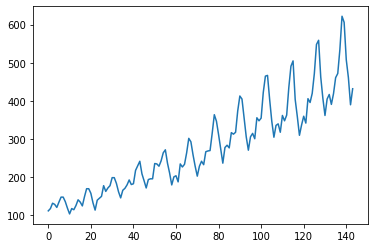

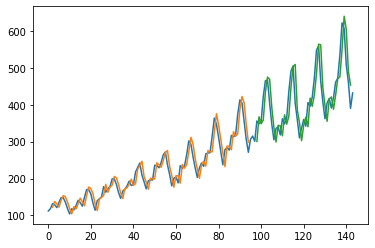

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredictPlot =numpy.empty_like(dataset)  # shape 일치하는 배열 생성
trainPredictPlot[ : , : ] = numpy.nan
trainPredictPlot[look_back : len(trainPredict)+look_back, : ] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[ : , : ] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1 : len(dataset)-1, : ] = testPredict
plt.plot(dataset)
plt.show()

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [18]:

# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding


#주어진 문장을 '단어'로 토큰화 하기

#케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러 옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence # 워드시퀀스
 
# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화 합니다.
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)

#단어 빈도수 세기

#전처리 하려는 세개의 문장을 정합니다.
# 인덱스로 단어를 구분한다, OrderedDict: 순서가 있는 dict
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용 # 문자열배열을 구성하고 배열의 인덱스로 단어 인식
 
#단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다. 
 
print("\n단어 카운트:\n", token.word_counts) 
#Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict클래스를 사용합니다.
 
#출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index) # 문자 -> 인덱스 : encoding 문자 -> 숫자




원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']

단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'텍스트의': 2, '각': 1, '토큰화': 3, '나누어': 1, '단어를': 1, '먼저': 1, '합니다': 1, '딥러닝에서': 2, '인식됩니다': 1, '단어로': 1, '해야': 1, '할': 1, '수': 1, '한': 1, '결과는': 1, '있습니다': 1, '사용': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


In [22]:
# 텍스트 리뷰 자료를 지정합니다. # 영화에 대한 감상평을 이용한 긍정부정 감정 분석모델
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요",
        "글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화 
token = Tokenizer() # 문장이나 여타요소를 고려하여 단어장을 생성 : 인덱스를 부여
token.fit_on_texts(docs)
print(token.word_index)
x = token.texts_to_sequences(docs) # 텍스트 -> 인덱스로 변경 [1, 2], [3]..
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)

x_text = token.sequences_to_texts(x)
print("텍스트로:\n",  x_text)

# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다. # 일정한 사이즈로 (부족하면 0으로 채우고 남으면 절단)
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)
 
#딥러닝 모델
print("\n딥러닝 모델 시작:")

#임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1
 
#단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()

# input wordsize output 8 정의:유사도 특징추출(신경망)
# 이웃(같이 자주사용하는 단어)의 유사도를 학습 : bigram(두개 단어 같이 사용빈도), trigram(세개 단어 같이 사용빈도)으로 분석
model.add(Embedding(word_size, 8, input_length=4)) 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) # 감정평가 0, 1
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_x, classes, epochs=20) # 일정한사이즈로 조절한 sequence 입력
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
텍스트로:
 ['너무 재밌네요', '최고예요', '참 잘 만든 영화예요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요', '글쎄요', '별로예요', '생각보다 지루하네요', '연기가 어색해요', '재미없어요']

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]

딥러닝 모델 시작:
Epoch 1/20
1/1 [==============================] - 0s 999us/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 992us/step - loss: 0.6920 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 0s/step - loss: 0.6900 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 986us/step - loss: 0.6879 - accura

In [39]:
"""
문서->토큰화->인코딩(숫자로 변경)->Embedding(유사도 특징추출)->모델
LSTM으로 뉴스 카테고리 분석
"""

# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters # 46개분야 기사
from tensorflow.keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical



# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2) # 문서의 단어 제한

# 데이터 확인하기
category = numpy.max(Y_train) + 1 # Y_train : 종속변수의 범주값
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 인코딩 번호 -> 이미 인코딩 되어있다

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100) # 사이즈 100개로 정리
x_test = sequence.pad_sequences(X_test, maxlen=100)  
y_train = to_categorical(Y_train) # 종속변수는 원핫인코딩
y_test = to_categorical(Y_test)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Epoch 1/20
90/90 [==============================] - 7s 74ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 8s 86ms/step - loss: 2.0343 - accuracy: 0.4905 - val_loss: 1.9434 - val_accuracy: 0.4911
Epoch 3/20
90/90 [==============================] - 7s 78ms/step - loss: 1.8457 - accuracy: 0.5239 - val_loss: 1.7790 - val_accuracy: 0.5557
Epoch 4/20
90/90 [==============================] - 6s 69ms/step - loss: 1.7606 - accuracy: 0.5459 - val_loss: 1.7379 - val_accuracy: 0.5583
Epoch 5/20
90/90 [==============================] - 6s 62ms/step - loss: 1.6541 - accuracy: 0.5726 - val_loss: 1.6544 - val_accuracy: 0.5721
Epoch 6/20
90/90 [==============================] - 6s 62ms/step - loss: 1.6734 - accuracy: 0.5667 - val_loss: 1.6574 - val_accuracy: 0.5980
Epoch 7/20
90/90 [==============================] - 5s 61ms/step - loss: 1.5549 - accuracy: 0.6091 - val_loss: 1.5688 - val_accuracy: 0.6135
Epoch 8/20
90

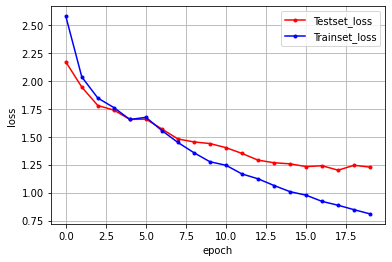

In [40]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100)) # 100개의 특성으로 유사도 고려한 특징 추출
model.add(LSTM(100, activation='tanh')) 
model.add(Dense(46, activation='softmax')) # 46개의 범주화

# 모델의 컴파일
model.compile(loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy']) 

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1])) # 0 loss, 1 acc


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()# 현재:과적합

In [57]:
print((type(x_train)))
print(x_train.shape)
# print(type(x_train[8990]))

<class 'numpy.ndarray'>
(8982, 100)


17465344/17464789 [==============================] - 1s 0us/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 56        
______________________________________________________

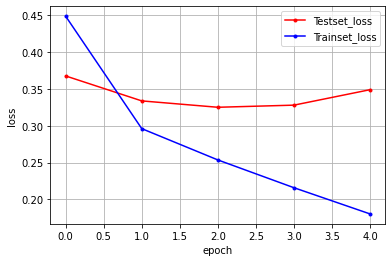

In [28]:
"""
cnn(cov1d):text conv2d-cnn
이웃을 고려한 특징 추출(bigram, trigram): 짝지은 2단어 3단어
1d : 필터 적용, 안정적인 추출
영화리뷰 : 긍정부정(감정추출)
"""

# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))# 5000개의 단어를 가진 영화광 - 100개 벡터
model.add(Dropout(0.5)) # 과적합 피하기 위해

# 필터의 갯수 5x5(행과열이 동일할때는)
# 주변을 고려한 특징 추출(bigram, trigram)
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))# 16칸을 하나로


model.add(LSTM(55)) # 셀의 출력차수
model.add(Dense(1)) # 가중치 생성 55x1
model.add(Activation('sigmoid')) # 감정분석
model.summary()

# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#단어장이 제공됨
dictionary = imdb.get_word_index(path='imbd_word_index.json')
imdb_key = dictionary.keys()
list(imdb_key)[1063]
keytotal = list(imdb_key)
sentance = []
for x, num in enumerate(x_train[8980]):
    res = keytotal[x]
    sentance.apped(res)
print(sentance)


In [ ]:
# 오전 종료 ===========================================================================================================================================================================================================

In [42]:
"""
DCGAN
KERAS(Wrapper아서 숨겨둔 부분이 많다)
"""

#-*- coding: utf-8 -*-

from tensorflow.keras.datasets import mnist # 숫자이미지 학습 => 숫자생성
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout

# 배치정규화 평균0 표준편차1로 쓰면 학습효율이 좋았다
# LeaskyReLu : 음수 -1까지 고려
# UpSampling2D : pooling의 반대
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D

# sequential : output1개, Model 상속 : 여러개의 output가능(입력, 출력을 연결)
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#이미지가 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

np.random.seed(3)
tf.random.set_seed(3)

#생성자 모델을 만듭니다. # DCGAN : GAN변형 알고리즘
generator = Sequential() # 작은 사이즈에서 큰 사이즈로 확대

# LeakyReLU 음수 -1 허용 : Relu 는 -는 0처리  # 입력 : 100size noise(1차원)
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2))) # 100x6272

generator.add(BatchNormalization()) # 평균는 0 표준편차는 1 한번더정규화
generator.add(Reshape((7, 7, 128))) # cov 결과 처럼 사이즈를 재편성
generator.add(UpSampling2D()) # 업샘플링 : 사이즈 추가 #14x14x128 2배! (default 2x2)
generator.add(Conv2D(64, kernel_size=5, padding='same')) # 64 5x5 필터 적용 #14x14x64

generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 28x28x64 2배!
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh')) # 원본 이미지 생성 # 28x28x1
 

In [54]:
# 업샘플링 2d의 이해
import numpy as np
import tensorflow as tf
input_shape = (2, 2, 1, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x, end='\n\n----------\n\n')
y = tf.keras.layers.UpSampling2D(size=(2, 2))(x) # 확대 <> pooling
print(y)

[[[[ 0  1  2]]

  [[ 3  4  5]]]


 [[[ 6  7  8]]

  [[ 9 10 11]]]]

----------

tf.Tensor(
[[[[ 0  1  2]
   [ 0  1  2]]

  [[ 0  1  2]
   [ 0  1  2]]

  [[ 3  4  5]
   [ 3  4  5]]

  [[ 3  4  5]
   [ 3  4  5]]]


 [[[ 6  7  8]
   [ 6  7  8]]

  [[ 6  7  8]
   [ 6  7  8]]

  [[ 9 10 11]
   [ 9 10 11]]

  [[ 9 10 11]
   [ 9 10 11]]]], shape=(2, 4, 2, 3), dtype=int32)


In [55]:
#판별자 모델을 만듭니다. # 진짜 가짜 이미지 둘다수용하여 참, 거짓판단 # 학습 ㄴ : 판별자의 가중치는 생성자에게로 감
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, # 진짜나 가짜나 같은 사이즈 
                         strides=2, input_shape=(28,28,1), padding="same")) # 14x14x64 :stride
discriminator.add(Activation(LeakyReLU(0.2))) 
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same")) # 7x7x128 :stride 
    #이미지 사이즈는 줄어들고 특징은 늘어나고
    
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3)) # 과적합 방지

# FFNN으로 변경 (출력층만 남기때문에..)
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid')) # (7x7x128) x1 # 0, 1
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False # 학습기능 OFF # gan compile 할때만 작동하는 옵션 
    # gan을 학습할때는 discriminator를 학습정지 (가중치 수정 ㄴㄴ)

#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,)) # noise 1차원
dis_output = discriminator(generator(ginput)) # 1개짜리 가짜이미지에대한 판별
gan = Model(ginput, dis_output) # (입력, 출력) : 생성기와 판별기 연결부
    
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary() # 요약 데이터 작성


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_14 (Sequential)   (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.7053  g_loss:0.6912
epoch:1  d_loss:0.4624  g_loss:0.3282
epoch:2  d_loss:0.5686  g_loss:0.1025
epoch:3  d_loss:0.6585  g_loss:0.0836
epoch:4  d_loss:0.5768  g_loss:0.1651
epoch:5  d_loss:0.5088  g_loss:0.4210
epoch:6  d_loss:0.4876  g_loss:0.6972
epoch:7  d_loss:0.5092  g_loss:0.8700
epoch:8  d_loss:0.4966  g_loss:0.8969
epoch:9  d_loss:0.4861  g_loss:0.8720
epoch:10  d_loss:0.4175  g_loss:0.7868
epoch:11  d_loss:0.4390  g_loss:0.8097
epoch:12  d_loss:0.4812  g_loss:0.8663
epoch:13  d_loss:0.4740  g_loss:0.9164
epoch:14  d_loss:0.5699  g_loss:0.9749
epoch:15  d_loss:0.4717  g_loss:1.0447
epoch:16  d_loss:0.4014  g_loss:1.0517
epoch:17  d_loss:0.6241  g_loss:0.7709
epoch:18  d_loss:0.5694  g_loss:0.6370
epoch:19  d_loss:0.4590  g_loss:0.7240
epoch:20  d_loss:0.4243  g_loss:0.8051
epoch:21  d_loss:0.5022  g_loss:0.8339
epoch:22  d_loss:0.5147  g_loss:0.6766
epoch:23  d_loss:0.4560  g_loss:0.6245
epoch:24  d_loss:0.4527  g_loss:0.6689
epoch:25  d_loss:0.4670  g_loss:0.7

epoch:209  d_loss:0.3237  g_loss:2.1398
epoch:210  d_loss:0.4340  g_loss:1.9536
epoch:211  d_loss:0.3963  g_loss:2.0822
epoch:212  d_loss:0.4780  g_loss:2.3005
epoch:213  d_loss:0.5699  g_loss:2.3970
epoch:214  d_loss:0.4778  g_loss:1.9307
epoch:215  d_loss:0.4380  g_loss:1.7963
epoch:216  d_loss:0.5128  g_loss:1.7576
epoch:217  d_loss:0.4368  g_loss:1.5899
epoch:218  d_loss:0.5106  g_loss:1.7237
epoch:219  d_loss:0.5042  g_loss:1.7063
epoch:220  d_loss:0.5046  g_loss:1.8696
epoch:221  d_loss:0.4753  g_loss:2.2161
epoch:222  d_loss:0.5239  g_loss:1.6278
epoch:223  d_loss:0.6573  g_loss:1.6102
epoch:224  d_loss:0.6533  g_loss:1.5250
epoch:225  d_loss:0.5164  g_loss:1.5881
epoch:226  d_loss:0.4703  g_loss:1.5747
epoch:227  d_loss:0.5087  g_loss:1.8271
epoch:228  d_loss:0.4772  g_loss:1.7091
epoch:229  d_loss:0.4288  g_loss:1.7233
epoch:230  d_loss:0.4624  g_loss:1.9697
epoch:231  d_loss:0.5248  g_loss:1.9111
epoch:232  d_loss:0.5639  g_loss:1.7665
epoch:233  d_loss:0.5578  g_loss:1.9074


epoch:415  d_loss:0.3690  g_loss:1.7781
epoch:416  d_loss:0.4236  g_loss:2.0033
epoch:417  d_loss:0.2775  g_loss:1.9062
epoch:418  d_loss:0.5080  g_loss:1.9913
epoch:419  d_loss:0.4364  g_loss:1.9491
epoch:420  d_loss:0.3412  g_loss:2.1400
epoch:421  d_loss:0.4745  g_loss:1.9192
epoch:422  d_loss:0.3876  g_loss:2.0828
epoch:423  d_loss:0.3997  g_loss:1.5738
epoch:424  d_loss:0.6664  g_loss:1.3514
epoch:425  d_loss:0.3248  g_loss:2.0417
epoch:426  d_loss:0.3939  g_loss:1.9582
epoch:427  d_loss:0.3883  g_loss:2.2468
epoch:428  d_loss:0.3845  g_loss:2.0976
epoch:429  d_loss:0.4743  g_loss:2.2760
epoch:430  d_loss:0.4026  g_loss:1.7939
epoch:431  d_loss:0.3686  g_loss:2.3324
epoch:432  d_loss:0.4036  g_loss:2.1730
epoch:433  d_loss:0.3505  g_loss:2.2348
epoch:434  d_loss:0.3552  g_loss:2.3834
epoch:435  d_loss:0.3214  g_loss:2.4985
epoch:436  d_loss:0.2983  g_loss:1.9171
epoch:437  d_loss:0.3611  g_loss:1.6896
epoch:438  d_loss:0.3602  g_loss:2.1541
epoch:439  d_loss:0.2702  g_loss:2.6864


epoch:621  d_loss:0.3058  g_loss:2.3695
epoch:622  d_loss:0.4713  g_loss:1.8836
epoch:623  d_loss:0.5989  g_loss:1.6882
epoch:624  d_loss:0.4735  g_loss:1.7443
epoch:625  d_loss:0.4343  g_loss:2.1423
epoch:626  d_loss:0.3853  g_loss:2.3733
epoch:627  d_loss:0.2709  g_loss:2.9293
epoch:628  d_loss:0.7845  g_loss:2.0790
epoch:629  d_loss:0.6205  g_loss:2.5554
epoch:630  d_loss:0.5306  g_loss:3.0395
epoch:631  d_loss:0.8493  g_loss:1.8399
epoch:632  d_loss:1.2287  g_loss:1.6300
epoch:633  d_loss:0.8875  g_loss:1.1167
epoch:634  d_loss:0.7981  g_loss:0.8477
epoch:635  d_loss:0.7285  g_loss:1.0686
epoch:636  d_loss:0.5816  g_loss:1.6319
epoch:637  d_loss:0.6100  g_loss:1.5028
epoch:638  d_loss:0.6267  g_loss:1.5736
epoch:639  d_loss:0.3633  g_loss:1.8790
epoch:640  d_loss:0.2582  g_loss:2.2940
epoch:641  d_loss:0.3499  g_loss:1.9812
epoch:642  d_loss:0.1892  g_loss:2.2060
epoch:643  d_loss:0.1259  g_loss:2.6116
epoch:644  d_loss:0.2614  g_loss:2.8276
epoch:645  d_loss:0.2344  g_loss:2.6044


epoch:827  d_loss:0.5005  g_loss:2.0135
epoch:828  d_loss:0.3164  g_loss:2.1527
epoch:829  d_loss:0.3515  g_loss:2.0587
epoch:830  d_loss:0.5345  g_loss:1.8835
epoch:831  d_loss:0.5233  g_loss:2.1180
epoch:832  d_loss:0.2704  g_loss:2.5434
epoch:833  d_loss:0.3425  g_loss:2.1380
epoch:834  d_loss:0.3037  g_loss:2.5320
epoch:835  d_loss:0.3963  g_loss:2.0346
epoch:836  d_loss:0.3790  g_loss:1.9655
epoch:837  d_loss:0.3777  g_loss:1.5650
epoch:838  d_loss:0.2808  g_loss:1.8843
epoch:839  d_loss:0.3211  g_loss:2.3166
epoch:840  d_loss:0.2883  g_loss:2.2996
epoch:841  d_loss:0.4827  g_loss:2.0652
epoch:842  d_loss:0.4313  g_loss:1.8851
epoch:843  d_loss:0.3279  g_loss:2.1370
epoch:844  d_loss:0.4851  g_loss:1.9702
epoch:845  d_loss:0.4838  g_loss:1.8420
epoch:846  d_loss:0.4074  g_loss:1.5885
epoch:847  d_loss:0.5111  g_loss:1.5039
epoch:848  d_loss:0.4626  g_loss:1.5050
epoch:849  d_loss:0.3080  g_loss:2.0221
epoch:850  d_loss:0.2958  g_loss:2.3209
epoch:851  d_loss:0.3443  g_loss:1.9700


epoch:1033  d_loss:0.5317  g_loss:1.7390
epoch:1034  d_loss:0.4496  g_loss:1.4703
epoch:1035  d_loss:0.3722  g_loss:1.8056
epoch:1036  d_loss:0.5493  g_loss:1.8158
epoch:1037  d_loss:0.4915  g_loss:1.6035
epoch:1038  d_loss:0.5076  g_loss:1.9460
epoch:1039  d_loss:0.3393  g_loss:2.3942
epoch:1040  d_loss:0.5182  g_loss:1.8653
epoch:1041  d_loss:0.5710  g_loss:1.8605
epoch:1042  d_loss:0.5450  g_loss:1.7659
epoch:1043  d_loss:0.4575  g_loss:1.7672
epoch:1044  d_loss:0.4438  g_loss:2.1234
epoch:1045  d_loss:0.4167  g_loss:2.1738
epoch:1046  d_loss:0.3332  g_loss:2.1481
epoch:1047  d_loss:0.3652  g_loss:2.2588
epoch:1048  d_loss:0.3183  g_loss:2.0819
epoch:1049  d_loss:0.3166  g_loss:2.0966
epoch:1050  d_loss:0.3411  g_loss:2.4960
epoch:1051  d_loss:0.3542  g_loss:2.0705
epoch:1052  d_loss:0.2077  g_loss:2.2191
epoch:1053  d_loss:0.3345  g_loss:2.1969
epoch:1054  d_loss:0.1790  g_loss:2.3596
epoch:1055  d_loss:0.2303  g_loss:2.6680
epoch:1056  d_loss:0.2107  g_loss:2.8112
epoch:1057  d_lo

epoch:1233  d_loss:0.4711  g_loss:1.9828
epoch:1234  d_loss:0.3682  g_loss:2.3782
epoch:1235  d_loss:0.5429  g_loss:1.8862
epoch:1236  d_loss:0.3099  g_loss:2.1775
epoch:1237  d_loss:0.2722  g_loss:2.0864
epoch:1238  d_loss:0.5827  g_loss:1.3741
epoch:1239  d_loss:0.4182  g_loss:1.4630
epoch:1240  d_loss:0.3726  g_loss:1.9325
epoch:1241  d_loss:0.3096  g_loss:2.4076
epoch:1242  d_loss:0.2832  g_loss:2.5953
epoch:1243  d_loss:0.3307  g_loss:2.4472
epoch:1244  d_loss:0.2935  g_loss:2.1857
epoch:1245  d_loss:0.3929  g_loss:1.5121
epoch:1246  d_loss:0.3045  g_loss:1.6464
epoch:1247  d_loss:0.3751  g_loss:1.7043
epoch:1248  d_loss:0.4172  g_loss:2.2627
epoch:1249  d_loss:0.2722  g_loss:2.4825
epoch:1250  d_loss:0.3601  g_loss:2.4234
epoch:1251  d_loss:0.4485  g_loss:1.8704
epoch:1252  d_loss:0.3739  g_loss:1.8535
epoch:1253  d_loss:0.4298  g_loss:1.8704
epoch:1254  d_loss:0.4532  g_loss:1.9044
epoch:1255  d_loss:0.4861  g_loss:2.2102
epoch:1256  d_loss:0.4217  g_loss:2.2499
epoch:1257  d_lo

epoch:1433  d_loss:0.3535  g_loss:2.1504
epoch:1434  d_loss:0.3500  g_loss:2.0407
epoch:1435  d_loss:0.4343  g_loss:1.9461
epoch:1436  d_loss:0.5197  g_loss:1.3297
epoch:1437  d_loss:0.5423  g_loss:1.4535
epoch:1438  d_loss:0.4177  g_loss:1.6417
epoch:1439  d_loss:0.5094  g_loss:1.6271
epoch:1440  d_loss:0.5046  g_loss:1.7218
epoch:1441  d_loss:0.4129  g_loss:1.8984
epoch:1442  d_loss:0.4786  g_loss:1.6773
epoch:1443  d_loss:0.4317  g_loss:1.6565
epoch:1444  d_loss:0.3958  g_loss:2.1040
epoch:1445  d_loss:0.4962  g_loss:2.0827
epoch:1446  d_loss:0.3804  g_loss:2.0118
epoch:1447  d_loss:0.5162  g_loss:2.0291
epoch:1448  d_loss:0.4674  g_loss:2.1496
epoch:1449  d_loss:0.5695  g_loss:1.8275
epoch:1450  d_loss:0.3708  g_loss:1.3984
epoch:1451  d_loss:0.5846  g_loss:1.3477
epoch:1452  d_loss:0.5785  g_loss:1.4041
epoch:1453  d_loss:0.5971  g_loss:1.5074
epoch:1454  d_loss:0.4669  g_loss:1.6000
epoch:1455  d_loss:0.3773  g_loss:2.1257
epoch:1456  d_loss:0.4408  g_loss:1.9438
epoch:1457  d_lo

epoch:1634  d_loss:0.3768  g_loss:2.1694
epoch:1635  d_loss:0.5775  g_loss:1.4939
epoch:1636  d_loss:0.5368  g_loss:1.4375
epoch:1637  d_loss:0.5288  g_loss:1.8323
epoch:1638  d_loss:0.4597  g_loss:1.7155
epoch:1639  d_loss:0.4133  g_loss:1.8914
epoch:1640  d_loss:0.3320  g_loss:2.3836
epoch:1641  d_loss:0.4027  g_loss:2.0827
epoch:1642  d_loss:0.3397  g_loss:1.9397
epoch:1643  d_loss:0.4829  g_loss:1.9050
epoch:1644  d_loss:0.4047  g_loss:1.7941
epoch:1645  d_loss:0.6172  g_loss:1.8340
epoch:1646  d_loss:0.4358  g_loss:1.3904
epoch:1647  d_loss:0.4967  g_loss:1.6147
epoch:1648  d_loss:0.5680  g_loss:1.7189
epoch:1649  d_loss:0.4674  g_loss:1.9235
epoch:1650  d_loss:0.5854  g_loss:1.6005
epoch:1651  d_loss:0.5032  g_loss:1.7692
epoch:1652  d_loss:0.3854  g_loss:2.0311
epoch:1653  d_loss:0.4631  g_loss:1.9992
epoch:1654  d_loss:0.5270  g_loss:2.0224
epoch:1655  d_loss:0.4195  g_loss:1.3108
epoch:1656  d_loss:0.5142  g_loss:1.4203
epoch:1657  d_loss:0.5232  g_loss:1.3750
epoch:1658  d_lo

epoch:1835  d_loss:0.4936  g_loss:1.9466
epoch:1836  d_loss:0.5770  g_loss:2.0208
epoch:1837  d_loss:0.5307  g_loss:1.8117
epoch:1838  d_loss:0.5198  g_loss:2.1319
epoch:1839  d_loss:0.4876  g_loss:1.7388
epoch:1840  d_loss:0.4739  g_loss:1.4883
epoch:1841  d_loss:0.5120  g_loss:1.6166
epoch:1842  d_loss:0.5962  g_loss:1.5034
epoch:1843  d_loss:0.6449  g_loss:1.5501
epoch:1844  d_loss:0.4465  g_loss:1.7775
epoch:1845  d_loss:0.4775  g_loss:1.9389
epoch:1846  d_loss:0.5856  g_loss:1.5077
epoch:1847  d_loss:0.6383  g_loss:1.5025
epoch:1848  d_loss:0.5637  g_loss:1.1933
epoch:1849  d_loss:0.5982  g_loss:1.2261
epoch:1850  d_loss:0.6106  g_loss:1.6241
epoch:1851  d_loss:0.5662  g_loss:1.3264
epoch:1852  d_loss:0.7244  g_loss:1.3597
epoch:1853  d_loss:0.5380  g_loss:1.4355
epoch:1854  d_loss:0.5491  g_loss:1.6055
epoch:1855  d_loss:0.5350  g_loss:1.4363
epoch:1856  d_loss:0.4209  g_loss:1.1373
epoch:1857  d_loss:0.5497  g_loss:1.6810
epoch:1858  d_loss:0.4474  g_loss:1.7308
epoch:1859  d_lo

epoch:2035  d_loss:0.3393  g_loss:2.0638
epoch:2036  d_loss:0.5505  g_loss:1.9397
epoch:2037  d_loss:0.4451  g_loss:1.9139
epoch:2038  d_loss:0.5328  g_loss:1.6046
epoch:2039  d_loss:0.3740  g_loss:1.5881
epoch:2040  d_loss:0.4847  g_loss:1.5751
epoch:2041  d_loss:0.5073  g_loss:1.7143
epoch:2042  d_loss:0.5252  g_loss:1.7587
epoch:2043  d_loss:0.5219  g_loss:1.9563
epoch:2044  d_loss:0.4503  g_loss:1.9181
epoch:2045  d_loss:0.4350  g_loss:1.6764
epoch:2046  d_loss:0.5173  g_loss:1.6576
epoch:2047  d_loss:0.6724  g_loss:1.0347
epoch:2048  d_loss:0.3681  g_loss:1.6999
epoch:2049  d_loss:0.5280  g_loss:1.8464
epoch:2050  d_loss:0.4393  g_loss:1.6542
epoch:2051  d_loss:0.4022  g_loss:1.4780
epoch:2052  d_loss:0.7401  g_loss:1.4154
epoch:2053  d_loss:0.5307  g_loss:1.8888
epoch:2054  d_loss:0.5887  g_loss:1.5287
epoch:2055  d_loss:0.4901  g_loss:1.2079
epoch:2056  d_loss:0.4472  g_loss:1.4786
epoch:2057  d_loss:0.4298  g_loss:1.3225
epoch:2058  d_loss:0.4542  g_loss:1.6666
epoch:2059  d_lo

epoch:2235  d_loss:0.6072  g_loss:1.4227
epoch:2236  d_loss:0.5010  g_loss:1.5074
epoch:2237  d_loss:0.3880  g_loss:1.5040
epoch:2238  d_loss:0.3677  g_loss:2.0286
epoch:2239  d_loss:0.4801  g_loss:1.4443
epoch:2240  d_loss:0.5296  g_loss:1.5018
epoch:2241  d_loss:0.4861  g_loss:1.4675
epoch:2242  d_loss:0.6733  g_loss:1.1287
epoch:2243  d_loss:0.5527  g_loss:1.5193
epoch:2244  d_loss:0.5478  g_loss:1.4210
epoch:2245  d_loss:0.4550  g_loss:1.4493
epoch:2246  d_loss:0.4763  g_loss:1.7081
epoch:2247  d_loss:0.5677  g_loss:1.5499
epoch:2248  d_loss:0.4598  g_loss:1.7338
epoch:2249  d_loss:0.4991  g_loss:1.3762
epoch:2250  d_loss:0.5357  g_loss:1.5792
epoch:2251  d_loss:0.6270  g_loss:1.2112
epoch:2252  d_loss:0.4799  g_loss:1.5642
epoch:2253  d_loss:0.3979  g_loss:1.6369
epoch:2254  d_loss:0.5834  g_loss:1.7197
epoch:2255  d_loss:0.6272  g_loss:1.5099
epoch:2256  d_loss:0.5385  g_loss:1.1000
epoch:2257  d_loss:0.4592  g_loss:1.5484
epoch:2258  d_loss:0.4805  g_loss:1.5175
epoch:2259  d_lo

epoch:2435  d_loss:0.4148  g_loss:2.0545
epoch:2436  d_loss:0.4490  g_loss:1.7218
epoch:2437  d_loss:0.4716  g_loss:1.8239
epoch:2438  d_loss:0.5000  g_loss:1.9084
epoch:2439  d_loss:0.3985  g_loss:1.5818
epoch:2440  d_loss:0.4898  g_loss:1.8546
epoch:2441  d_loss:0.5188  g_loss:1.6300
epoch:2442  d_loss:0.5917  g_loss:1.6556
epoch:2443  d_loss:0.4009  g_loss:1.7851
epoch:2444  d_loss:0.7077  g_loss:1.5414
epoch:2445  d_loss:0.6529  g_loss:1.3324
epoch:2446  d_loss:0.5872  g_loss:1.3487
epoch:2447  d_loss:0.5480  g_loss:1.5215
epoch:2448  d_loss:0.6394  g_loss:1.1645
epoch:2449  d_loss:0.5102  g_loss:1.7652
epoch:2450  d_loss:0.5116  g_loss:1.4967
epoch:2451  d_loss:0.6181  g_loss:1.4873
epoch:2452  d_loss:0.7315  g_loss:0.9983
epoch:2453  d_loss:0.5701  g_loss:1.2881
epoch:2454  d_loss:0.5033  g_loss:1.5033
epoch:2455  d_loss:0.5714  g_loss:1.5209
epoch:2456  d_loss:0.4867  g_loss:1.6705
epoch:2457  d_loss:0.4598  g_loss:1.4978
epoch:2458  d_loss:0.4877  g_loss:1.2767
epoch:2459  d_lo

epoch:2635  d_loss:0.4647  g_loss:1.7913
epoch:2636  d_loss:0.4870  g_loss:1.5478
epoch:2637  d_loss:0.7285  g_loss:1.2924
epoch:2638  d_loss:0.4812  g_loss:1.9560
epoch:2639  d_loss:0.7844  g_loss:1.3798
epoch:2640  d_loss:0.4980  g_loss:1.7491
epoch:2641  d_loss:0.5423  g_loss:1.9832
epoch:2642  d_loss:0.4970  g_loss:2.5422
epoch:2643  d_loss:0.5608  g_loss:1.9279
epoch:2644  d_loss:0.7080  g_loss:1.3763
epoch:2645  d_loss:0.5944  g_loss:1.1343
epoch:2646  d_loss:0.5690  g_loss:1.1510
epoch:2647  d_loss:0.6926  g_loss:1.1896
epoch:2648  d_loss:0.5928  g_loss:1.7450
epoch:2649  d_loss:0.4449  g_loss:2.3108
epoch:2650  d_loss:0.4157  g_loss:2.2228
epoch:2651  d_loss:0.4831  g_loss:1.9096
epoch:2652  d_loss:0.4817  g_loss:1.8282
epoch:2653  d_loss:0.4293  g_loss:1.7288
epoch:2654  d_loss:0.5005  g_loss:1.7161
epoch:2655  d_loss:0.4168  g_loss:1.7294
epoch:2656  d_loss:0.4374  g_loss:1.7709
epoch:2657  d_loss:0.4254  g_loss:1.8819
epoch:2658  d_loss:0.3613  g_loss:1.7025
epoch:2659  d_lo

epoch:2836  d_loss:0.3882  g_loss:1.9181
epoch:2837  d_loss:0.5211  g_loss:1.7319
epoch:2838  d_loss:0.4017  g_loss:1.9244
epoch:2839  d_loss:0.3970  g_loss:2.0434
epoch:2840  d_loss:0.4452  g_loss:1.8610
epoch:2841  d_loss:0.4157  g_loss:1.6046
epoch:2842  d_loss:0.4137  g_loss:1.6617
epoch:2843  d_loss:0.5237  g_loss:1.6001
epoch:2844  d_loss:0.5843  g_loss:1.5834
epoch:2845  d_loss:0.4092  g_loss:1.1894
epoch:2846  d_loss:0.5180  g_loss:1.5315
epoch:2847  d_loss:0.5601  g_loss:1.7683
epoch:2848  d_loss:0.6531  g_loss:1.2936
epoch:2849  d_loss:0.5202  g_loss:1.4906
epoch:2850  d_loss:0.5671  g_loss:1.7326
epoch:2851  d_loss:0.5606  g_loss:1.4458
epoch:2852  d_loss:0.6489  g_loss:1.1960
epoch:2853  d_loss:0.5578  g_loss:1.4953
epoch:2854  d_loss:0.6352  g_loss:1.3225
epoch:2855  d_loss:0.5104  g_loss:1.6129
epoch:2856  d_loss:0.5030  g_loss:1.4850
epoch:2857  d_loss:0.4790  g_loss:1.6120
epoch:2858  d_loss:0.5680  g_loss:1.4465
epoch:2859  d_loss:0.4487  g_loss:1.7740
epoch:2860  d_lo

epoch:3037  d_loss:0.5162  g_loss:1.8309
epoch:3038  d_loss:0.5388  g_loss:1.7333
epoch:3039  d_loss:0.4193  g_loss:1.6928
epoch:3040  d_loss:0.5973  g_loss:1.5137
epoch:3041  d_loss:0.6055  g_loss:1.4694
epoch:3042  d_loss:0.5267  g_loss:1.5328
epoch:3043  d_loss:0.3998  g_loss:1.5901
epoch:3044  d_loss:0.4198  g_loss:1.9130
epoch:3045  d_loss:0.4114  g_loss:1.8275
epoch:3046  d_loss:0.3941  g_loss:1.8637
epoch:3047  d_loss:0.5039  g_loss:1.4349
epoch:3048  d_loss:0.4500  g_loss:1.6342
epoch:3049  d_loss:0.4082  g_loss:1.3491
epoch:3050  d_loss:0.5194  g_loss:1.5015
epoch:3051  d_loss:0.4618  g_loss:1.9961
epoch:3052  d_loss:0.4681  g_loss:1.7155
epoch:3053  d_loss:0.3376  g_loss:2.0223
epoch:3054  d_loss:0.3661  g_loss:1.7697
epoch:3055  d_loss:0.3792  g_loss:1.9466
epoch:3056  d_loss:0.4415  g_loss:2.0747
epoch:3057  d_loss:0.4440  g_loss:1.9216
epoch:3058  d_loss:0.3816  g_loss:2.3679
epoch:3059  d_loss:0.3733  g_loss:1.7558
epoch:3060  d_loss:0.4604  g_loss:2.2403
epoch:3061  d_lo

epoch:3237  d_loss:0.5106  g_loss:1.3871
epoch:3238  d_loss:0.4332  g_loss:1.5241
epoch:3239  d_loss:0.4833  g_loss:1.7823
epoch:3240  d_loss:0.4707  g_loss:1.8865
epoch:3241  d_loss:0.4905  g_loss:1.6979
epoch:3242  d_loss:0.6132  g_loss:1.5115
epoch:3243  d_loss:0.5241  g_loss:1.4510
epoch:3244  d_loss:0.4410  g_loss:1.8640
epoch:3245  d_loss:0.4226  g_loss:1.9489
epoch:3246  d_loss:0.4575  g_loss:1.4266
epoch:3247  d_loss:0.5199  g_loss:1.4719
epoch:3248  d_loss:0.4765  g_loss:1.8701
epoch:3249  d_loss:0.5743  g_loss:1.7302
epoch:3250  d_loss:0.5613  g_loss:1.9252
epoch:3251  d_loss:0.5412  g_loss:1.7816
epoch:3252  d_loss:0.4129  g_loss:1.4700
epoch:3253  d_loss:0.3943  g_loss:1.6863
epoch:3254  d_loss:0.3931  g_loss:1.7537
epoch:3255  d_loss:0.3697  g_loss:1.7706
epoch:3256  d_loss:0.4518  g_loss:1.4953
epoch:3257  d_loss:0.3296  g_loss:1.8998
epoch:3258  d_loss:0.4321  g_loss:1.8775
epoch:3259  d_loss:0.3508  g_loss:1.5441
epoch:3260  d_loss:0.4265  g_loss:2.0151
epoch:3261  d_lo

epoch:3437  d_loss:0.4656  g_loss:1.8847
epoch:3438  d_loss:0.4921  g_loss:2.3131
epoch:3439  d_loss:0.3693  g_loss:2.2856
epoch:3440  d_loss:0.3883  g_loss:2.1484
epoch:3441  d_loss:0.5019  g_loss:1.8120
epoch:3442  d_loss:0.4542  g_loss:1.7633
epoch:3443  d_loss:0.4416  g_loss:1.4440
epoch:3444  d_loss:0.4365  g_loss:1.5760
epoch:3445  d_loss:0.5008  g_loss:1.8544
epoch:3446  d_loss:0.4360  g_loss:2.3382
epoch:3447  d_loss:0.4007  g_loss:2.1253
epoch:3448  d_loss:0.4146  g_loss:2.4958
epoch:3449  d_loss:0.5368  g_loss:1.8629
epoch:3450  d_loss:0.5483  g_loss:1.6631
epoch:3451  d_loss:0.4809  g_loss:1.3533
epoch:3452  d_loss:0.4174  g_loss:1.5521
epoch:3453  d_loss:0.5101  g_loss:1.7422
epoch:3454  d_loss:0.4143  g_loss:1.8645
epoch:3455  d_loss:0.4286  g_loss:2.1170
epoch:3456  d_loss:0.6078  g_loss:2.0365
epoch:3457  d_loss:0.4822  g_loss:1.4915
epoch:3458  d_loss:0.6289  g_loss:1.3162
epoch:3459  d_loss:0.4261  g_loss:1.2699
epoch:3460  d_loss:0.4838  g_loss:1.5803
epoch:3461  d_lo

epoch:3637  d_loss:0.5613  g_loss:1.6568
epoch:3638  d_loss:0.3741  g_loss:1.8425
epoch:3639  d_loss:0.3842  g_loss:2.0532
epoch:3640  d_loss:0.5317  g_loss:1.6243
epoch:3641  d_loss:0.5630  g_loss:1.3329
epoch:3642  d_loss:0.5901  g_loss:1.3379
epoch:3643  d_loss:0.5768  g_loss:1.3866
epoch:3644  d_loss:0.5354  g_loss:1.5026
epoch:3645  d_loss:0.4558  g_loss:1.5794
epoch:3646  d_loss:0.5286  g_loss:1.8841
epoch:3647  d_loss:0.5737  g_loss:1.3714
epoch:3648  d_loss:0.5218  g_loss:1.6558
epoch:3649  d_loss:0.7141  g_loss:1.3057
epoch:3650  d_loss:0.4621  g_loss:1.8915
epoch:3651  d_loss:0.5236  g_loss:1.5776
epoch:3652  d_loss:0.5582  g_loss:1.5605
epoch:3653  d_loss:0.4786  g_loss:1.5385
epoch:3654  d_loss:0.4910  g_loss:1.5948
epoch:3655  d_loss:0.5073  g_loss:1.5154
epoch:3656  d_loss:0.5361  g_loss:1.1535
epoch:3657  d_loss:0.4532  g_loss:1.6927
epoch:3658  d_loss:0.4071  g_loss:1.8881
epoch:3659  d_loss:0.4152  g_loss:1.8320
epoch:3660  d_loss:0.4734  g_loss:1.6201
epoch:3661  d_lo

epoch:3837  d_loss:0.5787  g_loss:1.8438
epoch:3838  d_loss:0.4466  g_loss:1.5695
epoch:3839  d_loss:0.5957  g_loss:1.6344
epoch:3840  d_loss:0.4161  g_loss:1.6852
epoch:3841  d_loss:0.5027  g_loss:1.6711
epoch:3842  d_loss:0.4798  g_loss:1.8175
epoch:3843  d_loss:0.4786  g_loss:1.5015
epoch:3844  d_loss:0.5574  g_loss:1.4562
epoch:3845  d_loss:0.5879  g_loss:1.1883
epoch:3846  d_loss:0.5503  g_loss:1.2034
epoch:3847  d_loss:0.5828  g_loss:1.4784
epoch:3848  d_loss:0.4572  g_loss:1.8215
epoch:3849  d_loss:0.4965  g_loss:1.5887
epoch:3850  d_loss:0.3521  g_loss:1.7095
epoch:3851  d_loss:0.3968  g_loss:2.1281
epoch:3852  d_loss:0.4204  g_loss:1.8810
epoch:3853  d_loss:0.4066  g_loss:1.7147
epoch:3854  d_loss:0.4968  g_loss:1.4198
epoch:3855  d_loss:0.4265  g_loss:1.5097
epoch:3856  d_loss:0.4166  g_loss:1.8901
epoch:3857  d_loss:0.3576  g_loss:1.7984
epoch:3858  d_loss:0.4914  g_loss:1.6072
epoch:3859  d_loss:0.5277  g_loss:1.6697
epoch:3860  d_loss:0.5214  g_loss:1.2173
epoch:3861  d_lo

C:\Users\2-18\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


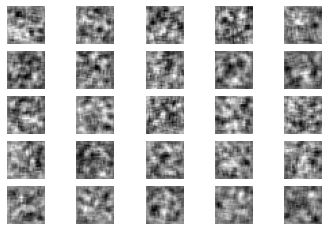

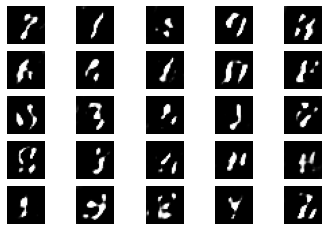

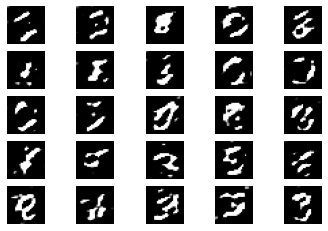

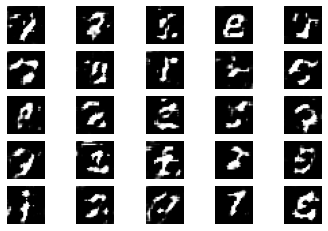

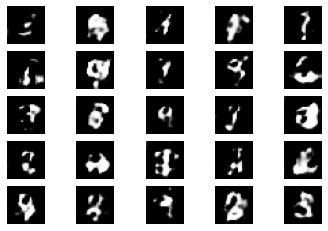

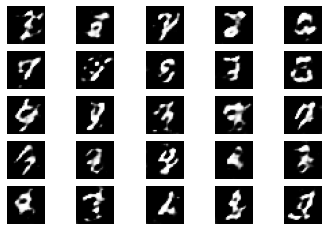

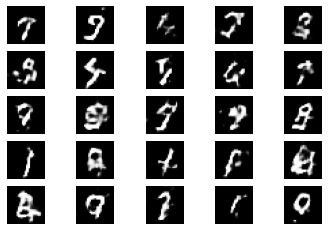

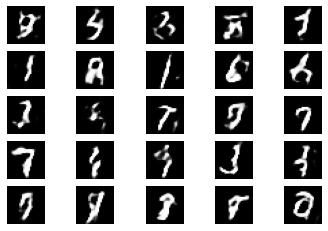

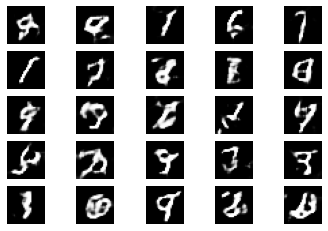

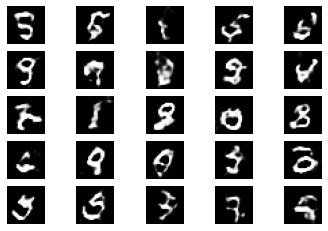

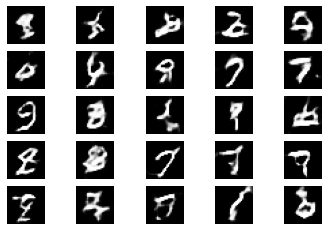

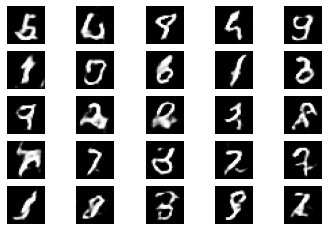

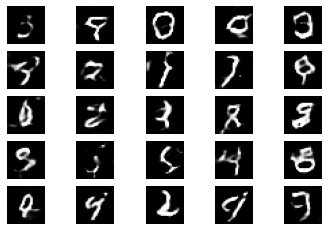

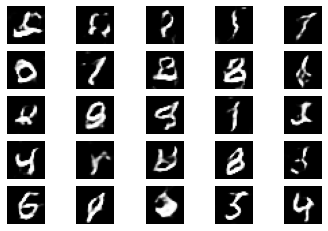

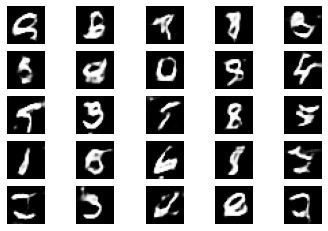

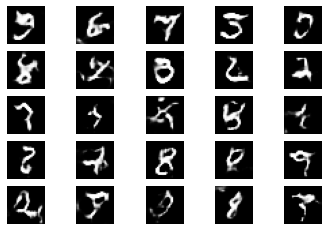

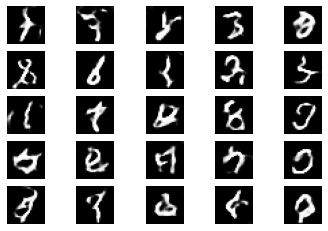

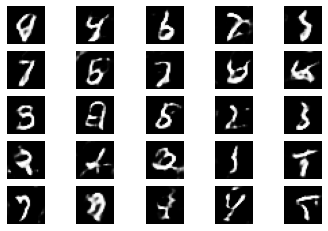

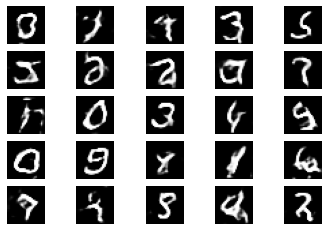

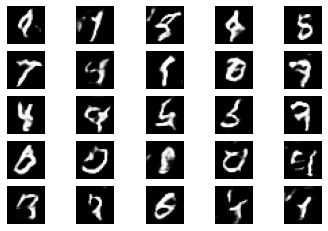

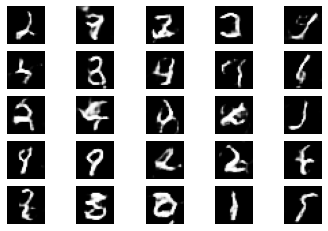

In [56]:

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval): # 파일저장시간 보장

  # MNIST 데이터 불러오기

    (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
    #비지도 학습
    
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = 
        (X_train - 127.5) / 127.5  
    # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 
    # 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
    #(tanh -1 ~ 1)
    
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

    true = np.ones((batch_size, 1)) # 판별기 학습시 진짜이미지일경우 모두 참
    fake = np.zeros((batch_size, 1)) # 가짜이미지일 경우 모두 거짓

    for i in range(epoch):
        # 실제 데이터를 판별자에 입력하는 부분입니다.
            # train_on_batch 한번의 학습으로 가중치를 수정
        idx = np.random.randint(0, X_train.shape[0], batch_size) # 32장씩 선택(batchsize = 32)
        imgs = X_train[idx] # 임의의 이미지 선정
        d_loss_real = discriminator.train_on_batch(imgs, true) # 선택한 이미지

        #가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, 100)) # 32x100 노이즈 생성 : 이미지 씨앗 
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #0.5의 의미는 진짜일수도 가짜일수도 있다 확률이 반반이다(확답불가)
        g_loss = gan.train_on_batch(noise, true) # 노이즈를 주고 진짜이미지인것처럼 학습

        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
        if i % saving_interval == 0:
            #r, c = 5, 5
            noise = np.random.normal(0, 1, (25, 100)) # 테스트 데이터를 생성
            gen_imgs = generator.predict(noise) # 25장 이미지

            # Rescale images 0 - 1
            gen_imgs = 0.5 * gen_imgs + 0.5 # 진짜인지 가짜인지 모를때까지 학습 0.5

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
                    count += 1
            fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(4001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.